In [21]:
import random as rd

INF = 10000000

def generate_matrix(n, min_weight, max_weight):
    return [[rd.randint(min_weight, max_weight) for x in range(n)] for y in range(n)] 

In [22]:
import graphviz

def draw_graph(graph,n):
    #dot = graphviz.Digraph(comment='Nada')
    dot = graphviz.Digraph(comment='')
    for i in range(n):
        for j in range(n):
            weight = graph[i][j]
            if weight != INF and weight != 0: 
                dot.edge(str(i), str(j), label=str(weight))
    dot.graph_attr['rankdir'] = 'BT'
    return dot

In [23]:
def setup(table, path, graph, n):
    for i in range(n):
        for j in range(n):
            table[i][j] = graph[i][j]
            if graph[i][j] != INF:
                path[i][j] = j


def detect_negative_cycles(table, path, n):
    for k in range(n):
        for i in range(n):
            for j in range(n):
                if i != 0 or j!=0 or i!=j:
                    if table[i][k]+table[k][j] < table[i][j]:
                        table[i][j] = -INF
                        path[i][j] = -1

def floyd_warshall_util(table, path, graph, n, flag):
    setup(table,path,graph,n)
    cut = True

    for k in range(n):
        for i in range(n):
            for j in range(n):
                if i != k or j != k:
                    if flag == 0:
                        # Compare table[3][2]+table[2][2] < table [3][2] when k=2 and j=2 don't have sense -> table[2][2] = 0
                        # Compare table[2][2]+table[2][3] < table [2][3] when k=2 and i=2 dont't have sense -> table[2][2] = 0
                        if table[i][k]+table[k][j] < table[i][j]:
                            
                            if cut == True:
                                cut = False

                            # If the diagonal changed, there is a negative cycle
                            if i == j:
                                table = None
                                path = None
                                print("Negative cycle")
                                return

                            table[i][j] = table[i][k]+table[k][j] 
                            path[i][j] = path[i][k]
                    elif flag == 1:
                        # Find the minimun of the maximuns
                        table[i][j] = min(table[i][j], max(table[i][k],table[k][j]))
                    elif flag == 2:
                        # Find the max of the minimunms
                        table[i][j] = max(table[i][j], min(table[i][k],table[k][j]))

        # if k(n) == k(n+1) then the shortest path is already found
        if cut == True:
            return

            
    #detect_negative_cycles(table, path, n)



def get_path(table, path, start, end):
    path_aux = []

    #There is no path from start to end
    if table[start][end] == INF:
        return path_aux

    iterator = start
    while iterator != end:
        #There is a negative cycle
        if iterator == -1:
            return None
        path_aux.append(iterator)
        iterator = path[iterator][end]

    #There is a negative cycle
    if iterator == -1:
        return None
    path_aux.append(iterator)

    print("Min path:",table[start][end])
    return path_aux    


def floyd_warshall(graph, n, start, end, flag):
    table = [[None for x in range(n)] for y in range(n)] 
    path = [[None for x in range(n)] for y in range(n)] 

    # table - minimun weight from i to j
    # path - next element fron path[i][j]
    floyd_warshall_util(table, path, graph, n, flag)

    # Negative cycles
    if table == None:
        return None

    if flag != 0:
        return table[start][end]
    
    return get_path(table, path, start, end)


Min path: 5
[0, 1, 2]


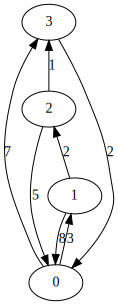

In [25]:
graph = [[0,3,INF,7],
         [8,0,2,INF], 
         [5,INF,0,1],
         [2,INF,INF,0]]

path = floyd_warshall(graph, 4, 0, 2, 0)
print(path)
draw_graph(graph,4)


# Comparation with Bellman-Ford

## Bellman-Ford
From single source: 
Complexity = O(V*E)

From all the vertexs in the graph:
Complexity = O(V(V*E)) 

## Floyd-Warshall
From all the vertexs in the graph:
Complexity = O(V^3) 


### If edges < vertex -> Bellman Ford is the best for find the path from all vertex
### Else -> Floyd Warshall is the best for find the path from all vertex
